In [30]:
import bempp.api
import numpy as np

import sys
sys.path.append('../../')
from decimal import *

import bemppUQ
from bemppUQ.config import config
from bemppUQ.operators.maxwell import assemble_operators, evaluate_far_field

bempp.api.global_parameters.hmat.eps = 1E-5

from bemppUQ.utils.mie import bhmie


In [31]:
k_ext, k_int = config["k_ext"], config["k_int"]
lambda_par, freq = config["lambda"], config["frequency"]
polarization = config["polarization"]
direction = config["direction"]

eps_rel = config["eps_rel"]
mu_rel = config["mu_rel"]
print("The exterior wavenumber is: {0}".format(k_ext))
print("The interior wavenumber is: {0}".format(k_int))

print("----")
print("The exterior wavelenght is: {0}".format(lambda_par))
print("The exterior frequency is: {:.2E}".format(Decimal(freq)))


The exterior wavenumber is: 5.0
The interior wavenumber is: 6.892024376045111
----
The exterior wavelenght is: 1.2566370614359172
The exterior frequency is: 2.39E+8


In [32]:
precision = 10
h = 2.0 * np.pi / (precision * config["k_int"])

grid = bempp.api.shapes.sphere(h=h)
k_int, k_ext = config['k_int'], config['k_ext']
print(grid.leaf_view.entity_count(1))
n = k_int / k_ext
refIndex = n
numAngles = 901
s1,s2,qext,qsca,qback,gsca=bhmie(k_ext,k_int / k_ext,numAngles)
transmission_operators = assemble_operators(grid, config)
far_field, solution = evaluate_far_field(transmission_operators, config)

6012
iteration - 1 || residual - 0.2345693459484499 0.49098896980285645
iteration - 2 || residual - 0.07652817338151993 0.16765236854553223
iteration - 3 || residual - 0.036722072271319246 0.16371369361877441
iteration - 4 || residual - 0.015784655276074637 0.16578459739685059
iteration - 5 || residual - 0.007157556868332022 0.16904759407043457
iteration - 6 || residual - 0.0037519497538213483 0.17826533317565918
iteration - 7 || residual - 0.0018139628077010514 0.16513419151306152
iteration - 8 || residual - 0.0007442855176087698 0.16797351837158203
iteration - 9 || residual - 0.00035360225261881883 0.16670751571655273
iteration - 10 || residual - 0.00019332796237451363 0.1595606803894043
iteration - 11 || residual - 0.0001164464925471222 0.16997838020324707
iteration - 12 || residual - 7.662203179190906e-05 0.16872429847717285
iteration - 13 || residual - 4.62147690138945e-05 0.16485166549682617
iteration - 14 || residual - 2.8773426796606212e-05 0.1630692481994629
iteration - 15 || 

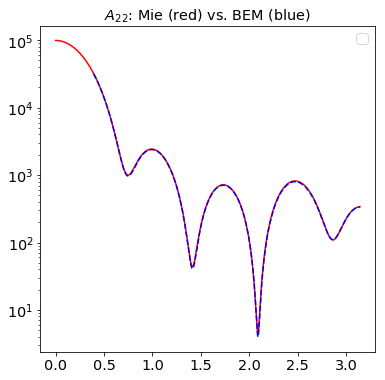

In [33]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

angles = config['angles']
k_ext = config['k_ext']

fig, ax  = plt.subplots(1,1, figsize=(6,6))

#A22 = -1j * k_ext * far_field[2,:]   # -1j * kExt is to make agree with eqn 3.21 p70 tBohren and Huffman
A22 = - 1j * k_ext * far_field[2,:]   # -1j * kExt is to make agree with eqn 3.21 p70 tBohren and Huffman

plt.rcParams['figure.figsize'] = (15, 4) # Increase the figure size in the notebook

ax.semilogy(angles[:1801],abs(4 * np.pi * s1)**2,'-r')
ax.semilogy(angles[:1801],abs(A22[:1801])**2,'--b')
ax.set_title('$A_{22}$: Mie (red) vs. BEM (blue)')

plt.legend()
plt.show() 

In [10]:
precision_list = [60]

for precision in precision_list:
    h = 2*np.pi/(precision*k_ext)
    print('Starting run for precision: ', precision)
    
    grid = bempp.api.shapes.sphere(h=h)
    N =  2 * grid.leaf_view.entity_count(1)
    print('Ndof: ', N)
    
    transmission_operators = assemble_operators(grid, config)
    far_field, solution = evaluate_far_field(transmission_operators, config)
    
    A22 = - 1j * k_ext * far_field[2,:]
    
    name = (
    "results/"
        + "precision"
    + str(precision)
    )

    my_dict = {
            "A22": A22,
            "h": h,
            "N": N,        
        }

    np.save(name + ".npy", my_dict)        

Starting run for precision:  60
Ndof:  204234
iteration - 1 || residual - 0.23350164689444813 9.008702754974365
iteration - 2 || residual - 0.07609745342032043 2.955658197402954
iteration - 3 || residual - 0.03649322687000782 2.8858706951141357
iteration - 4 || residual - 0.015515784093361518 2.9581987857818604
iteration - 5 || residual - 0.007009858883255086 2.896324396133423
iteration - 6 || residual - 0.003691531171746592 2.924980401992798
iteration - 7 || residual - 0.001737757324873765 2.9108831882476807
iteration - 8 || residual - 0.0006946989981537955 2.930227756500244
iteration - 9 || residual - 0.0003295785530122627 3.018831253051758
iteration - 10 || residual - 0.00018578392550993125 2.9316437244415283
iteration - 11 || residual - 0.00014076945310485196 2.9441685676574707
iteration - 12 || residual - 0.00011739833719186715 2.899364709854126
iteration - 13 || residual - 8.604597043973228e-05 2.9437344074249268
iteration - 14 || residual - 5.435976017056502e-05 2.93821382522583